In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading aggregated complaints without compdesc, final_train and Final_test with 80-20 split of NLP outputs of probabilities in each class
comp_num = pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Complaints\final_aggregated_complaints.csv", low_memory = True)
comp_desc_train = pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Target\final_train_nlp_cw.csv", low_memory = True)
comp_desc_test = pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Target\final_test_nlp_cw.csv", low_memory = True)


In [4]:
#checking shape of test and train
comp_desc_train.shape, comp_desc_test.shape

((136340, 8), (34085, 8))

In [5]:
comp_desc_train.columns

Index(['MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC', 'Class_0', 'Class_1',
       'Class_2', 'TARGET'],
      dtype='object')

In [6]:
comp_num.columns

Index(['MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC', 'TOTAL_COMPLAINTS',
       'CRASH_COUNT', 'MEDIAN_DAYS_TO_REPORT', 'FIRE_OCCURANCES',
       'POLICE_REPORTING', 'OWNERSHIP', 'ANTI_BRAKES', 'CRUISE_CONTROL',
       'MEDICAL_ATTENTION', 'VEHICLES_TOWED', 'NORTHEAST_STATES',
       'MIDWEST_STATES', 'SOUTH_STATES', 'WEST_STATES', 'US_TERRITORIES',
       'Q1_TOTAL', 'Q2_TOTAL', 'Q3_TOTAL', 'Q4_TOTAL', 'CT_IVOQ_COUNT',
       'CT_EVOQ_COUNT', 'CT_LETR_COUNT', 'CT_SVOQ_COUNT', 'CT_CON_COUNT',
       'DT_FWD_SUM', 'DT_4WD_SUM', 'DT_AWD_SUM', 'DT_RWD_SUM', 'FT_GAS_COUNT',
       'FT_BIFUEL_COUNT', 'FT_DIESEL_COUNT', 'FT_HYBRID_ELECTRIC_COUNT',
       'PT_VEHICLE', 'PT_EQUIPMENT', 'PT_CHILD_RESTRAINT', 'PT_TIRES',
       'MEAN_VEH_SPEED', 'MAX_VEH_SPEED', 'MEAN_AGE', 'MAX_AGE', 'MIN_AGE',
       'MEAN_MILES', 'MAX_MILES', 'MIN_MILES', 'MEAN_OCCURRENCES',
       'MAX_OCCURRENCES'],
      dtype='object')

In [7]:
import re
 
# Standardize column to match investigation dataset
def clean_make_column(make):
    if pd.isna(make):  # Handle NaN values
        return None
    make = make.strip().upper()  # Remove spaces and convert to uppercase
    #make = re.sub(r'[^A-Z0-9 -]', '', make)  # Remove non-alphanumeric characters except spaces and hyphens
    make = re.sub(r'\s+', ' ', make)  # Normalize multiple spaces
 
    return make

In [8]:
# Apply cleaning function in comp_num
comp_num['MAKETXT'] = comp_num['MAKETXT'].apply(clean_make_column)
comp_num['MODELTXT'] = comp_num['MODELTXT'].apply(clean_make_column)
#comp_num['YEARTXT'] = comp_num['YEARTXT'].apply(clean_make_column)
comp_num['COMPDESC'] = comp_num['COMPDESC'].apply(clean_make_column)

In [9]:
#final_train is modifying by mergeing the corresponding numerical rows from numerical aggregated complaints of primary keys.
final_train = comp_desc_train.merge(comp_num, how = 'inner', on = ['MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC'])

In [10]:
final_train.head()

,MAKETXT,MODELTXT,YEARTXT,COMPDESC,Class_0,Class_1,Class_2,TARGET,TOTAL_COMPLAINTS,CRASH_COUNT,...,MEAN_VEH_SPEED,MAX_VEH_SPEED,MEAN_AGE,MAX_AGE,MIN_AGE,MEAN_MILES,MAX_MILES,MIN_MILES,MEAN_OCCURRENCES,MAX_OCCURRENCES
0,NISSAN,VERSA,2017.0,LATCHES/LOCKS/LINKAGES:HOOD:LATCH,0.389372,0.249592,0.361036,0.0,1,0.0,...,45.000000,45.0,4.000000,4.0,4.0,27014.000000,27014.0,27014.0,1.0,1.0
1,SUBARU,FORESTER,2015.0,VEHICLE SPEED CONTROL:ACCELERATOR PEDAL,0.434607,0.284288,0.281105,0.0,5,4.0,...,23.666667,35.0,5.200000,8.0,0.0,45800.000000,82000.0,3000.0,1.0,1.0
2,FORD,ESCAPE,2005.0,SUSPENSION:FRONT:WHEEL BEARING,0.458078,0.531808,0.010114,0.0,1,0.0,...,60.000000,60.0,7.000000,7.0,7.0,30167.000000,30167.0,30167.0,1.0,1.0
3,HYUNDAI,ACCENT,2015.0,"SERVICE BRAKES, HYDRAULIC",0.501834,0.401919,0.096248,0.0,7,0.0,...,0.000000,0.0,8.857143,9.0,8.0,96493.562273,180000.0,0.0,1.0,1.0
4,CHEVROLET,CORVETTE,2017.0,EQUIPMENT,0.888440,0.108283,0.003278,0.0,1,0.0,...,NaN,NaN,3.000000,3.0,3.0,15000.000000,15000.0,15000.0,1.0,1.0


In [11]:
final_train.shape

(136196, 54)

In [12]:
#final_test is modifying by mergeing the corresponding numerical rows from numerical aggregated complaints of primary keys.
final_test = comp_desc_test.merge(comp_num, how = 'inner', on = ['MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC'])

In [13]:
#checking the distribution of final_train target value
final_train['TARGET'].value_counts()

0.0    131578
1.0      3746
2.0       872
Name: TARGET, dtype: int64

In [ ]:
# temp = comp_desc_train.merge(comp_num, how = 'left', on = ['MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC'])
# temp[temp['TOTAL_COMPLAINTS'].isna()]['TARGET'].sum()

In [ ]:
#temp[(temp['TOTAL_COMPLAINTS'].isna()) & (temp['TARGET'].isin([1,2])) ]

In [14]:
#checking the distribution of final_test target value
final_test['TARGET'].value_counts()

0.0    32809
1.0     1000
2.0      234
Name: TARGET, dtype: int64

In [17]:
#Saving the dataframe to csv
csv_filename_final_train = r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Target\final_train_ML.csv"
csv_filename_final_test = r"C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\Target\final_test_ML.csv"
final_train.to_csv(csv_filename_final_train, index=False, encoding='utf-8')
final_test.to_csv(csv_filename_final_test, index=False, encoding='utf-8')

---

### ML Model

In [15]:
#Installing relevant libraries for XG Boost
! pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#defining test and train data for xg boost
X_train = final_train.drop(columns=['TARGET', 'MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC' ])  
y_train = final_train['TARGET']
X_test = final_test.drop(columns=['TARGET', 'MAKETXT', 'MODELTXT', 'YEARTXT', 'COMPDESC' ])
y_test = final_test['TARGET']

In [17]:
# Encode categorical labels if necessary
le = LabelEncoder()
y_train = le.fit_transform(y_train) 
y_test = le.transform(y_test) 

In [19]:
y_train, y_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [29]:
#Initialize XGBoost classifier for multiclass classification
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="aucpr")

In [30]:
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_test_pred = xgb_model.predict(X_test)

In [ ]:
# le.classes_

In [31]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=['Low','Medium','High']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Model Accuracy: 0.9648

Classification Report:
               precision    recall  f1-score   support

         Low       0.97      1.00      0.98     32809
      Medium       0.58      0.06      0.11      1000
        High       0.54      0.16      0.24       234

    accuracy                           0.96     34043
   macro avg       0.70      0.41      0.44     34043
weighted avg       0.95      0.96      0.95     34043


Confusion Matrix:
 [[32747    37    25]
 [  934    59     7]
 [  192     5    37]]


---

### Gridsearch

### 1st without class-weights

In [51]:
# from sklearn.model_selection import GridSearchCV

# param_grid1 = {
#     "max_depth": [3, 5, 7],
#     "learning_rate": [0.01, 0.1, 0.15],
#     "n_estimators": [500, 700, 1000],
#     "reg_lambda": [0.01, 0.1, 1, 10],  
#     "reg_alpha": [0, 0.1, 0.5, 1]
# }

# grid_search1 = GridSearchCV(XGBClassifier(objective="multi:softmax", num_class=3), param_grid1, scoring="roc_auc_ovr_weighted", verbose=3,n_jobs=-1, cv=2)
# grid_search1.fit(X_train, y_train)

# print("Best Parameters:", grid_search1.best_params_)


Fitting 2 folds for each of 432 candidates, totalling 864 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 1}


In [24]:
#Importing library for saving best model with parameters found in gridsearch Cv
!pip install joblib 
import joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# #best model of first iteration without class-weights
# best_model1 = grid_search1.best_estimator_

# # Save the model
# joblib.dump(best_model1, r'C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\best_model.pkl')

# print("Best model saved successfully!")

In [54]:
# # Make predictions
# y_train_pred1 = best_model1.predict(X_train)
# y_test_pred1 = best_model1.predict(X_test)


In [ ]:
# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_test_pred1)
# print(f"Model Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_test_pred1, target_names=['Low','Medium','High']))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred1))

In [ ]:
# #loading the best model from first iteration to see the results
# loaded_model1 = joblib.load(r'C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\best_model.pkl')

# # Make predictions
# y_train_pred_bm1 = loaded_model1.predict(X_train)
# y_test_pred_bm1 = loaded_model1.predict(X_test)


In [62]:
#temp2 = final_train['TARGET'].value_counts().reset_index()
# count_0 = temp2[temp2['index'] == 0]['TARGET'].iloc[0]
# count_1 = temp2[temp2['index'] == 1]['TARGET'].iloc[0]
# count_2 = temp2[temp2['index'] == 2]['TARGET'].iloc[0]

----

### 2nd with class-weights

In [20]:
#importing libraries to introduce sample_weights
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb

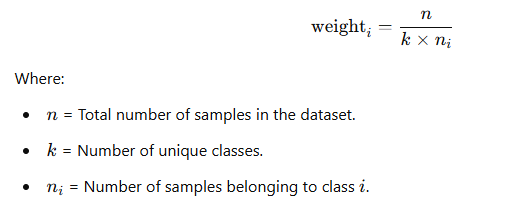

In [21]:
#calculating sample weights using the formula above
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
sample_weights

array([0.34503235, 0.34503235, 0.34503235, ..., 0.34503235, 0.34503235,
       0.34503235])

In [ ]:
# #second iteration with class weights.
# from sklearn.model_selection import GridSearchCV

# param_grid2 = {
#     "max_depth": [5, 7, 9],
#     "learning_rate": [0.01, 0.1, 0.15],
#     "n_estimators": [500, 700, 1000],
#     "reg_lambda": [0.01, 0.1, 1, 10],  
#     "reg_alpha": [0, 0.1, 0.5, 1]
# }

# grid_search2 = GridSearchCV(XGBClassifier(objective="multi:softmax", num_class=3), param_grid2, scoring="roc_auc_ovr_weighted", verbose=3,n_jobs=-1, cv=2)
# grid_search2.fit(X_train, y_train, sample_weight=sample_weights)

# print("Best Parameters:", grid_search2.best_params_)

In [ ]:
# best_model_cw = grid_search2.best_estimator_

# # Save the model
# joblib.dump(best_model_cw, r'C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\best_model_cw.pkl')

# print("Best model saved successfully!")

In [25]:
#loading the best model from first iteration to see the results
loaded_model2 = joblib.load(r'C:\Users\shanm\OneDrive\Desktop\Kavya\Spring 25\NHTSA dataset-20250211T191427Z-002\NHTSA dataset\best_model_cw.pkl')

# Make predictions
y_train_pred_bm2 = loaded_model2.predict(X_train)
y_test_pred_bm2 = loaded_model2.predict(X_test)

In [26]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_bm2)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_bm2, target_names=['Low','Medium','High']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_bm2))

Model Accuracy: 0.2552

Classification Report:
               precision    recall  f1-score   support

         Low       0.99      0.24      0.39     32809
      Medium       0.04      0.67      0.07      1000
        High       0.02      0.75      0.05       234

    accuracy                           0.26     34043
   macro avg       0.35      0.55      0.17     34043
weighted avg       0.96      0.26      0.37     34043


Confusion Matrix:
 [[ 7845 18185  6779]
 [   47   668   285]
 [    6    52   176]]


### Custom Weight Approach

In [32]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

# Define custom class weights (adjust as needed)
custom_class_weights = {0: 0.3, 1: 8, 2: 20}

# Map weights to each training sample
sample_weights_custom = np.array([custom_class_weights[label] for label in y_train])

xgb_model_ccw = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,  
    learning_rate=0.01,  
    max_depth=5,  
    n_estimators=1000,  
    reg_alpha=0.5,  
    reg_lambda=10,  
    eval_metric="aucpr",  # Use log loss for multiclass classification
    use_label_encoder=False
)

# Train the model using sample weights
xgb_model_ccw.fit(X_train, y_train, sample_weight=sample_weights_custom)

# Make predictions
y_test_pred_ccw = xgb_model.predict(X_test)


In [33]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_ccw)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_ccw, target_names=['Low','Medium','High']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_ccw))

Model Accuracy: 0.9648

Classification Report:
               precision    recall  f1-score   support

         Low       0.97      1.00      0.98     32809
      Medium       0.58      0.06      0.11      1000
        High       0.54      0.16      0.24       234

    accuracy                           0.96     34043
   macro avg       0.70      0.41      0.44     34043
weighted avg       0.95      0.96      0.95     34043


Confusion Matrix:
 [[32747    37    25]
 [  934    59     7]
 [  192     5    37]]


---

### Logarithmic Weight Approach

In [34]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

# Compute log-based class weights
y_train_series = pd.Series(y_train)
class_counts = y_train_series.value_counts().to_dict()
log_class_weights = {label: np.log(sum(class_counts.values()) / count) for label, count in class_counts.items()}

# Assign log weights to each sample
sample_weights_log = np.array([log_class_weights[label] for label in y_train])

xgb_model_log = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,  
    learning_rate=0.01,  
    max_depth=5,  
    n_estimators=1000,  
    reg_alpha=0.5,  
    reg_lambda=10,  
    eval_metric="aucpr",  # Use log loss for multiclass classification
    use_label_encoder=False
)

# Train the model using sample weights
xgb_model_log.fit(X_train, y_train, sample_weight=sample_weights_log)

# Make predictions
y_test_pred_log = xgb_model_log.predict(X_test)

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_test_pred_log)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_log, target_names=['Low','Medium','High']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_log))

Model Accuracy: 0.5250

Classification Report:
               precision    recall  f1-score   support

         Low       0.99      0.52      0.68     32809
      Medium       0.05      0.75      0.10      1000
        High       0.06      0.50      0.10       234

    accuracy                           0.53     34043
   macro avg       0.37      0.59      0.29     34043
weighted avg       0.96      0.53      0.66     34043


Confusion Matrix:
 [[17006 13887  1916]
 [  147   750   103]
 [   17    99   118]]


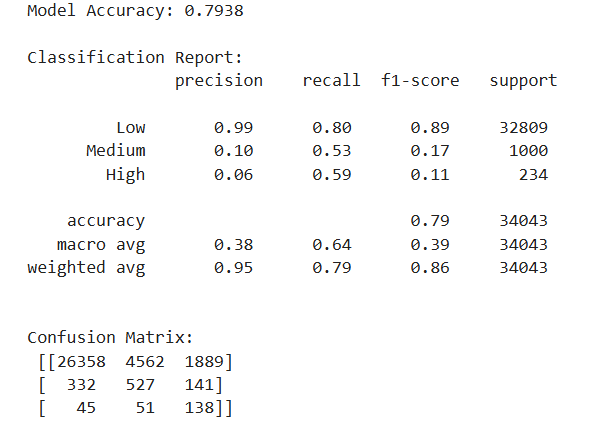